In [1]:
import duckdb
import pandas as pd
import matplotlib.pyplot as plt

# Conexão em memória (rápida e leve)
con = duckdb.connect(database=':memory:')

# URL do dataset
url = 'https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet'

## 00: Exploração do Schema (estrutura da base)

In [7]:
import os
os.makedirs('resultados', exist_ok=True)  # Cria a pasta se não existir

# Schema completo (funciona igual)
schema = con.sql(f"DESCRIBE SELECT * FROM read_parquet('{url}')").df()
display(schema)
schema.to_csv('resultados/dataset_schema.csv', index=False)

# Summary estatístico usando pandas (melhor alternativa ao SUMMARY do CLI)
print("Carregando dados para estatísticas resumidas (pode levar uns segundos)...")
df_full = con.sql(f"SELECT * FROM read_parquet('{url}')").df()

summary = df_full.describe(include='all')  # Inclui numéricas + categóricas/datas
display(summary)
summary.to_csv('resultados/dataset_summary.csv', index=False)

print("Schema e summary exportados com sucesso!")

,column_name,column_type,null,key,default,extra
0,VendorID,BIGINT,YES,None,None,None
1,tpep_pickup_datetime,TIMESTAMP,YES,None,None,None
2,tpep_dropoff_datetime,TIMESTAMP,YES,None,None,None
3,passenger_count,DOUBLE,YES,None,None,None
4,trip_distance,DOUBLE,YES,None,None,None
5,RatecodeID,DOUBLE,YES,None,None,None
6,store_and_fwd_flag,VARCHAR,YES,None,None,None
7,PULocationID,BIGINT,YES,None,None,None
8,DOLocationID,BIGINT,YES,None,None,None
9,payment_type,BIGINT,YES,None,None,None


Carregando dados para estatísticas resumidas (pode levar uns segundos)...


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,3.066766e+06,3066766,3066766,2.995023e+06,3.066766e+06,2.995023e+06,2995023,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06,2.995023e+06,2.995023e+06
unique,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,2975020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.730215e+00,2023-01-17 00:22:26.288164,2023-01-17 00:38:06.427874,1.362532e+00,3.847342e+00,1.497440e+00,NaN,1.663980e+02,1.643926e+02,1.194483e+00,1.836707e+01,1.537842e+00,4.882900e-01,3.367941e+00,5.184907e-01,9.820847e-01,2.702038e+01,2.274231e+00,1.074086e-01
min,1.000000e+00,2008-12-31 23:01:42,2009-01-01 14:29:11,0.000000e+00,0.000000e+00,1.000000e+00,NaN,1.000000e+00,1.000000e+00,0.000000e+00,-9.000000e+02,-7.500000e+00,-5.000000e-01,-9.622000e+01,-6.500000e+01,-1.000000e+00,-7.510000e+02,-2.500000e+00,-1.250000e+00
25%,1.000000e+00,2023-01-09 16:21:57.250000,2023-01-09 16:37:06,1.000000e+00,1.060000e+00,1.000000e+00,NaN,1.320000e+02,1.140000e+02,1.000000e+00,8.600000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,1.000000e+00,1.540000e+01,2.500000e+00,0.000000e+00
50%,2.000000e+00,2023-01-17 08:42:29.500000,2023-01-17 08:58:30.500000,1.000000e+00,1.800000e+00,1.000000e+00,NaN,1.620000e+02,1.620000e+02,1.000000e+00,1.280000e+01,1.000000e+00,5.000000e-01,2.720000e+00,0.000000e+00,1.000000e+00,2.016000e+01,2.500000e+00,0.000000e+00
75%,2.000000e+00,2023-01-24 16:26:27,2023-01-24 16:42:49,1.000000e+00,3.330000e+00,1.000000e+00,NaN,2.340000e+02,2.340000e+02,1.000000e+00,2.050000e+01,2.500000e+00,5.000000e-01,4.200000e+00,0.000000e+00,1.000000e+00,2.870000e+01,2.500000e+00,0.000000e+00
max,2.000000e+00,2023-02-01 00:56:53,2023-02-02 09:28:47,9.000000e+00,2.589281e+05,9.900000e+01,NaN,2.650000e+02,2.650000e+02,4.000000e+00,1.160100e+03,1.250000e+01,5.316000e+01,3.808000e+02,1.969900e+02,1.000000e+00,1.169400e+03,2.500000e+00,1.250000e+00


Schema e summary exportados com sucesso!


## 01: Análise Exploratória Básica

In [8]:
query = f"""
SELECT
    COUNT(*) AS total_trips,
    SUM(total_amount) AS total_revenue,
    AVG(total_amount) AS avg_fare,
    AVG(trip_distance) AS avg_distance_miles,
    AVG(passenger_count) AS avg_passengers
FROM read_parquet('{url}')
"""

basic_stats = con.sql(query).df()
display(basic_stats)
basic_stats.to_csv('resultados/trip_summary.csv', index=False)

# Gorjeta média
tip_query = f"""
SELECT ROUND(AVG(tip_amount / (total_amount - tip_amount)), 3) AS avg_tip_percentage
FROM read_parquet('{url}')
WHERE total_amount > tip_amount
"""

tip = con.sql(tip_query).df()
display(tip)

,total_trips,total_revenue,avg_fare,avg_distance_miles,avg_passengers
0,3066766,8.286519e+07,27.020383,3.847342,1.362532


,avg_tip_percentage
0,0.145


## 02: Padrões Temporais e Rotas


,pickup_hour,trips,avg_fare,avg_distance
0,18,215889,26.432962,3.958433
1,17,209493,28.315582,4.484603
2,15,196424,27.145644,3.672917
3,16,195977,29.228489,3.465677
4,19,192801,27.108594,3.796989
5,14,191604,27.719905,3.555390
6,13,178739,26.163805,3.228737
7,12,169858,25.364562,3.129530
8,20,165862,26.659938,3.455878
9,21,161548,27.252699,3.877063


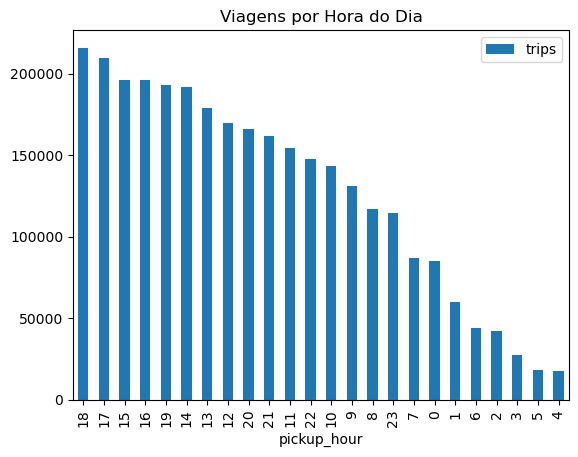

,PULocationID,DOLocationID,trip_count,total_revenue,avg_fare
0,132,265,5039,581142.90,115.329014
1,132,230,5912,537126.78,90.853650
2,264,264,15354,408978.94,26.636638
3,138,230,5130,373677.52,72.841622
4,132,48,3996,361064.31,90.356434
5,237,236,22303,340513.54,15.267612
6,236,237,18981,300974.64,15.856627
7,132,164,3158,292815.10,92.721691
8,132,170,2752,257706.89,93.643492
9,132,161,2584,241580.57,93.490933


In [ ]:
hourly_query = f"""
WITH trips AS (
    SELECT
        EXTRACT(HOUR FROM tpep_pickup_datetime) AS pickup_hour,
        total_amount,
        trip_distance
    FROM read_parquet('{url}')
)
SELECT
    pickup_hour,
    COUNT(*) AS trips,
    AVG(total_amount) AS avg_fare,
    AVG(trip_distance) AS avg_distance
FROM trips
GROUP BY pickup_hour
ORDER BY trips DESC
"""




hourly = con.sql(hourly_query).df()
display(hourly)
hourly.to_csv('resultados/hourly_patterns.csv', index=False)

# Visualização rápida
hourly.plot(x='pickup_hour', y='trips', kind='bar', title='Viagens por Hora do Dia')
plt.show()

# Top 10 rotas
routes_query = f"""
SELECT
    PULocationID,
    DOLocationID,
    COUNT(*) AS trip_count,
    SUM(total_amount) AS total_revenue,
    AVG(total_amount) AS avg_fare
FROM read_parquet('{url}')
GROUP BY PULocationID, DOLocationID
ORDER BY total_revenue DESC
LIMIT 10
"""

routes = con.sql(routes_query).df()
display(routes)
routes.to_csv('resultados/top_routes.csv', index=False)

## 03: Resumo Executivo com Window Functions

In [11]:
peak_query = f"""
WITH hourly AS (
    SELECT
        EXTRACT(HOUR FROM tpep_pickup_datetime) AS hour,
        COUNT(*) AS trips
    FROM read_parquet('{url}')
    GROUP BY hour
),
ranked AS (
    SELECT
        hour,
        trips,
        RANK() OVER (ORDER BY trips DESC) AS rank_peak
    FROM hourly
)
SELECT * FROM ranked ORDER BY hour
"""

peak = con.sql(peak_query).df()
display(peak)
peak.to_csv('resultados/peak_analysis.csv', index=False)

print("Todas as análises concluídas! Verifique a pasta resultados/.")

,hour,trips,rank_peak
0,0,84969,18
1,1,59799,19
2,2,42040,21
3,3,27438,22
4,4,17835,24
5,5,18011,23
6,6,43860,20
7,7,86877,17
8,8,116865,15
9,9,131111,14


Todas as análises concluídas! Verifique a pasta resultados/.
